In [1]:
from Utils import *

# Step 14
in this step we check tracks duration to understand what will be input duration for DL model


### Load data 

In [6]:
root_dir = r"C:\Users\yftac\Documents\00_Project_Afeka\ttc_calculation"

In [7]:
directory = r'C:\Users\yftac\Documents\00_Project_Afeka\ttc_calculation\13_data_tcc_flattened'
# Get a list of files in the directory
file_name_list = os.listdir(directory)
print(file_name_list)
recordingId_list=get_recordingsId_list(file_name_list)
recordingId_list

['18_data_flattened.csv', '19_data_flattened.csv', '20_data_flattened.csv', '21_data_flattened.csv', '22_data_flattened.csv', '23_data_flattened.csv', '24_data_flattened.csv', '25_data_flattened.csv', '26_data_flattened.csv', '27_data_flattened.csv', '28_data_flattened.csv', '29_data_flattened.csv']


['18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']

In [8]:
dfs = load_dfs(file_name_list, root_dir, directory)

In [10]:
dfs[4]

,recordingId,trackId,frame,trackLifetime,trackTotalNumFrames,xCenter,yCenter,heading,xVelocity,yVelocity,...,pairs,ttc_1,ttc_2,ttc_3,ttc_4,ttc_5,ttc_6,ttc_7,ttc_8,ttc_9
0,22,0,0,0,41,43.28069,-24.78654,264.37977,-1.35812,-3.61562,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22,0,1,1,41,42.99497,-25.50532,258.68761,-1.59720,-3.46023,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22,0,2,2,41,42.64966,-26.18718,252.51434,-1.85341,-3.24261,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22,0,3,3,41,42.24810,-26.80684,246.65441,-2.08825,-2.99432,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22,0,4,4,41,41.80333,-27.37893,241.13780,-2.28349,-2.74239,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56006,22,561,6154,35,40,83.53767,-12.87451,187.09915,-1.54762,-0.20327,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56007,22,561,6155,36,40,83.22760,-12.91742,187.42995,-1.54977,-0.21771,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56008,22,561,6156,37,40,82.91924,-12.96272,187.76616,-1.55626,-0.23129,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56009,22,561,6157,38,40,82.60572,-13.01038,188.10271,-1.56482,-0.24489,...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## create histograms for track duration

In [32]:
import matplotlib.ticker as ticker

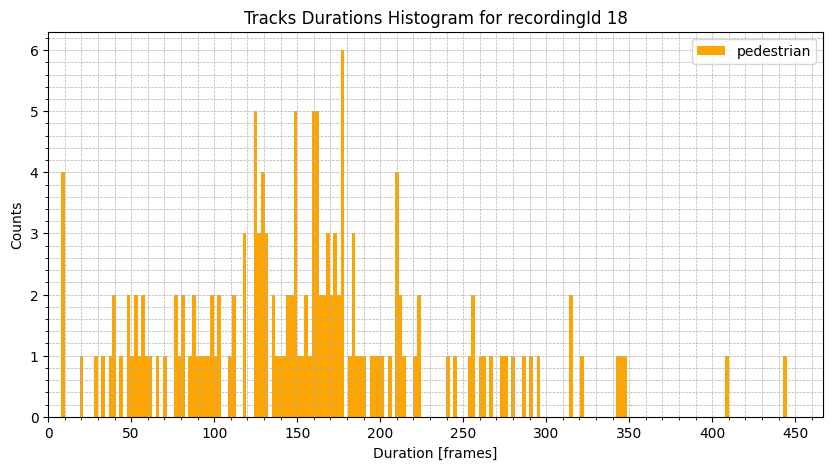

min. duration in recordingId 18:  8 [frames]
max. duration in recordingId 18:  445 [frames]
Bin width: 2.185

--------------------------------------------------



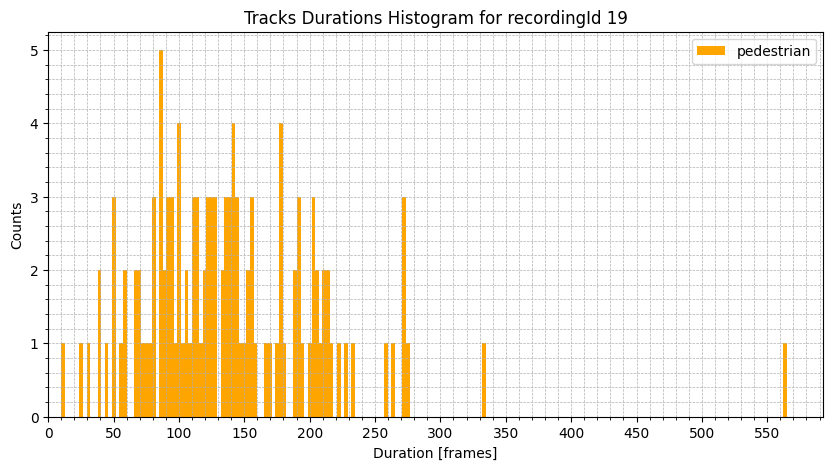

min. duration in recordingId 19:  10 [frames]
max. duration in recordingId 19:  565 [frames]
Bin width: 2.775

--------------------------------------------------



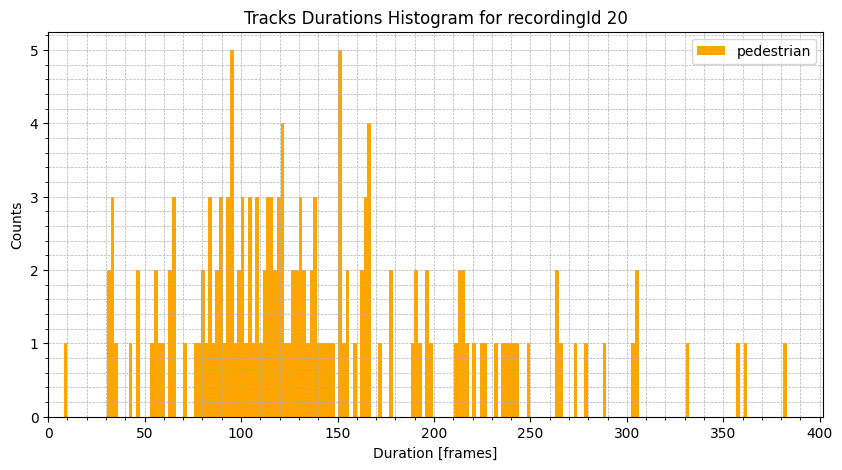

min. duration in recordingId 20:  8 [frames]
max. duration in recordingId 20:  383 [frames]
Bin width: 1.875

--------------------------------------------------



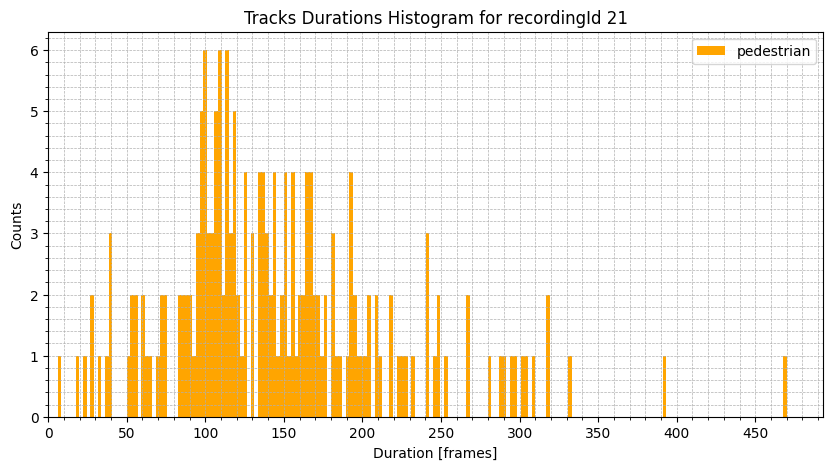

min. duration in recordingId 21:  6 [frames]
max. duration in recordingId 21:  470 [frames]
Bin width: 2.32

--------------------------------------------------



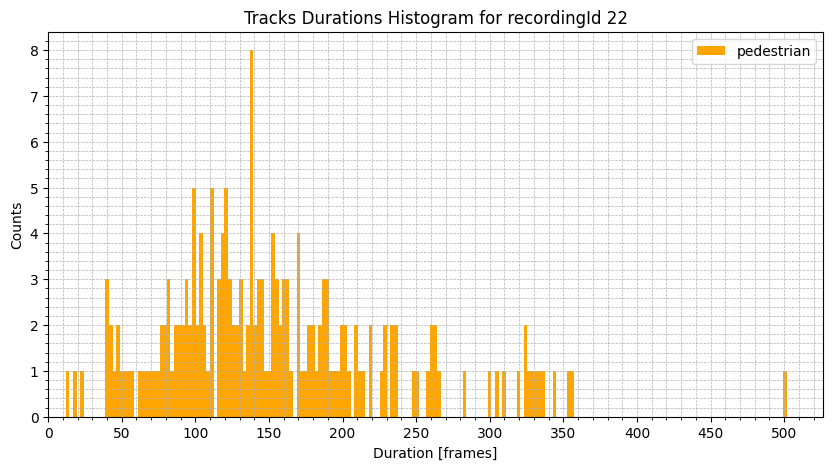

min. duration in recordingId 22:  12 [frames]
max. duration in recordingId 22:  502 [frames]
Bin width: 2.45

--------------------------------------------------



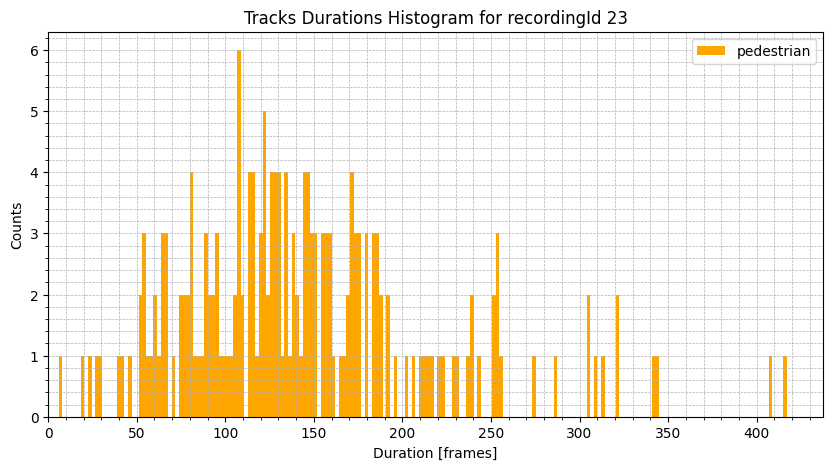

min. duration in recordingId 23:  6 [frames]
max. duration in recordingId 23:  417 [frames]
Bin width: 2.055

--------------------------------------------------



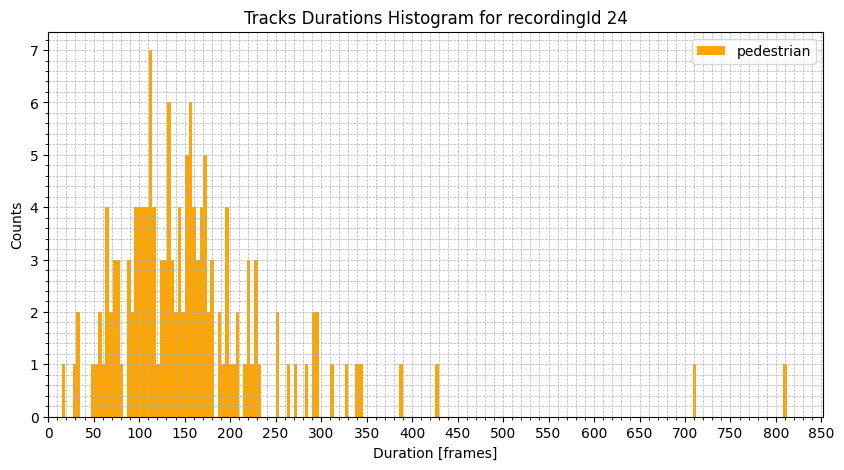

min. duration in recordingId 24:  15 [frames]
max. duration in recordingId 24:  812 [frames]
Bin width: 3.985

--------------------------------------------------



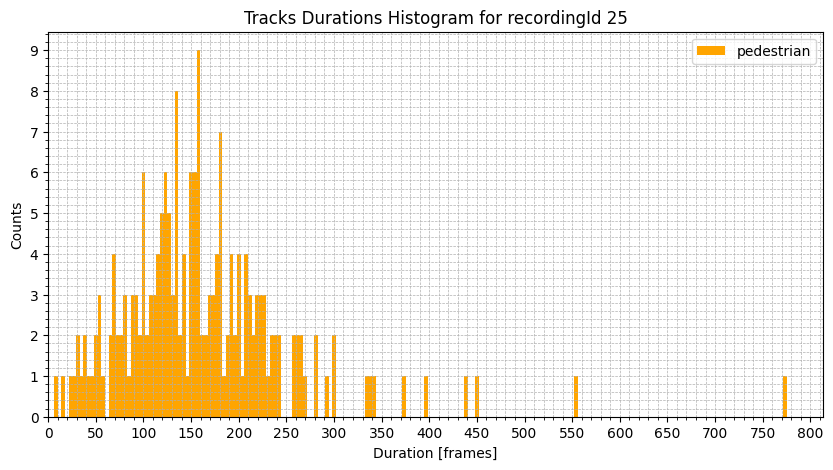

min. duration in recordingId 25:  6 [frames]
max. duration in recordingId 25:  775 [frames]
Bin width: 3.845

--------------------------------------------------



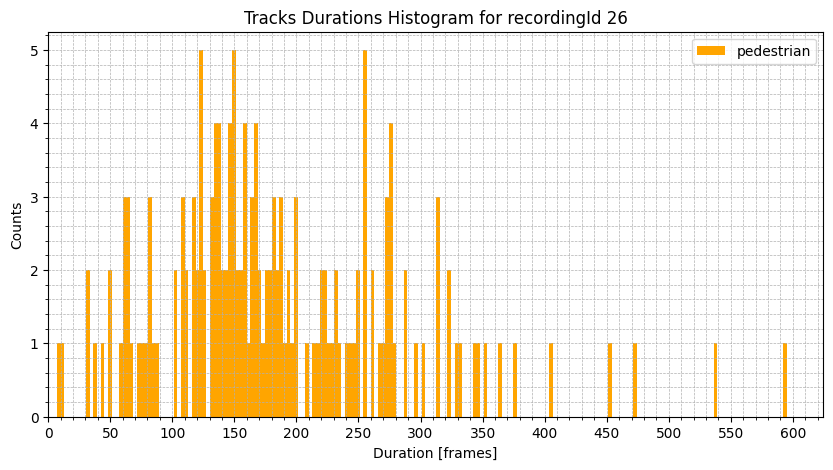

min. duration in recordingId 26:  7 [frames]
max. duration in recordingId 26:  595 [frames]
Bin width: 2.94

--------------------------------------------------



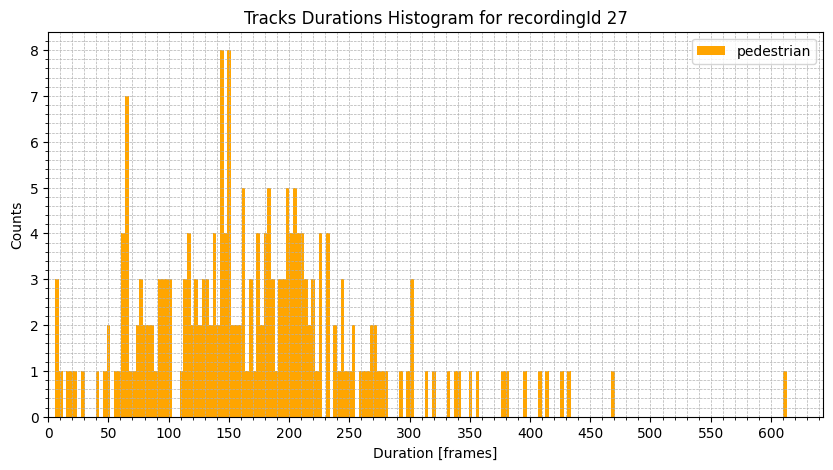

min. duration in recordingId 27:  6 [frames]
max. duration in recordingId 27:  613 [frames]
Bin width: 3.035

--------------------------------------------------



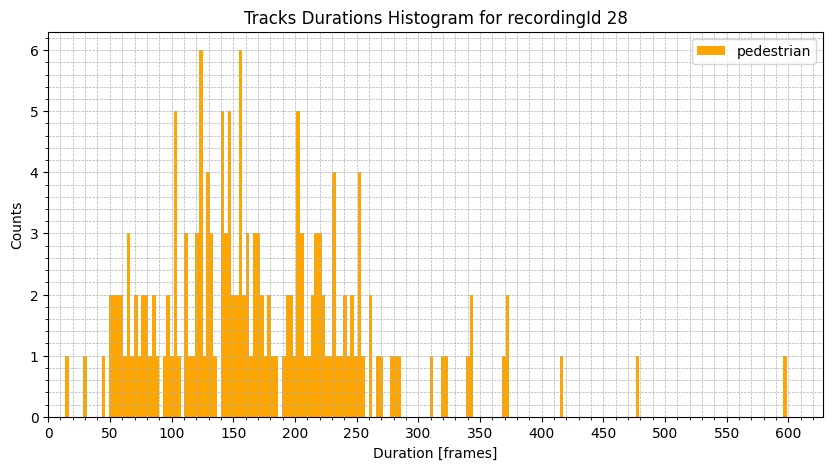

min. duration in recordingId 28:  14 [frames]
max. duration in recordingId 28:  599 [frames]
Bin width: 2.925

--------------------------------------------------



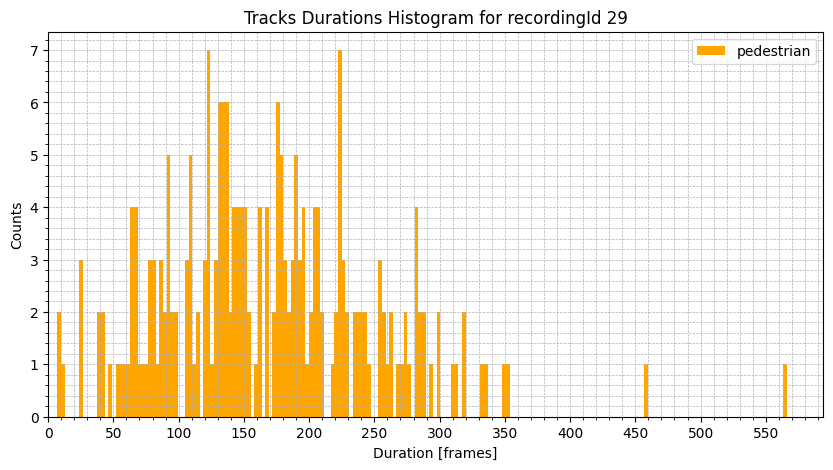

min. duration in recordingId 29:  7 [frames]
max. duration in recordingId 29:  566 [frames]
Bin width: 2.795

--------------------------------------------------



In [52]:
def print_histogram_of_duration(dfs):
    for i in range(len(dfs)):      # for each df
        # create df for of all durations for each trackId
        # filter class 'pedestrian
        class_to_filter= 'pedestrian'
        ped_df = dfs[i][dfs[i]['class'] == class_to_filter]
        ped_durations = ped_df.groupby('trackId')['trackTotalNumFrames'].max()
        track_durations=ped_durations

        #plot histogram
        plt.figure(i, figsize=(10,5))
        bins=200
        track_durations.hist(bins=bins, color="orange")
        
        plot_title = 'recordingId ' + str(dfs[i]['recordingId'].iloc[0])  # add the recordingId
        plt.title(f'Tracks Durations Histogram for {plot_title}')
        plt.xlabel('Duration [frames]')
        plt.ylabel('Counts')
        plt.legend([class_to_filter])
        
        # grid and ticks
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        plt.minorticks_on()
        plt.xlim(left=0)
        x_max = plt.gca().get_xlim()[1]
        plt.xticks(np.arange(0, int(x_max)+1, 50))
        y_max = plt.gca().get_ylim()[1]
        plt.yticks(np.arange(0, int(y_max)+1, 1))
        
        plt.show()
        # check what was the maximum duration and bins width
        min_duration = track_durations.min()
        max_duration = track_durations.max()
        print(f'min. duration in {plot_title}:  {min_duration} [frames]')
        print(f'max. duration in {plot_title}:  {max_duration} [frames]')
        bin_width = (max_duration - min_duration) / bins
        print(f"Bin width: {bin_width}")
        print("\n--------------------------------------------------\n")
    return

print_histogram_of_duration(dfs)

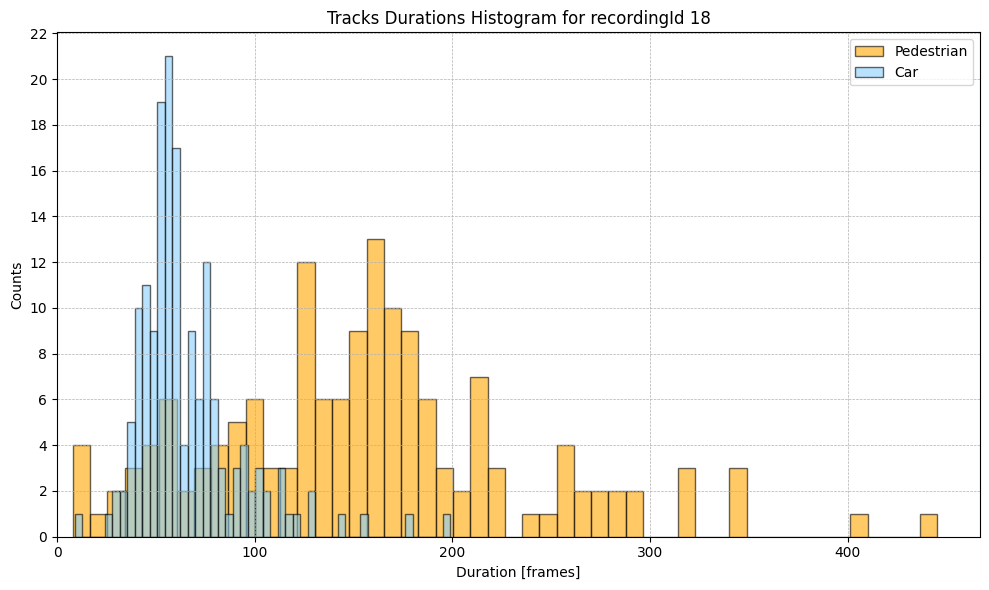

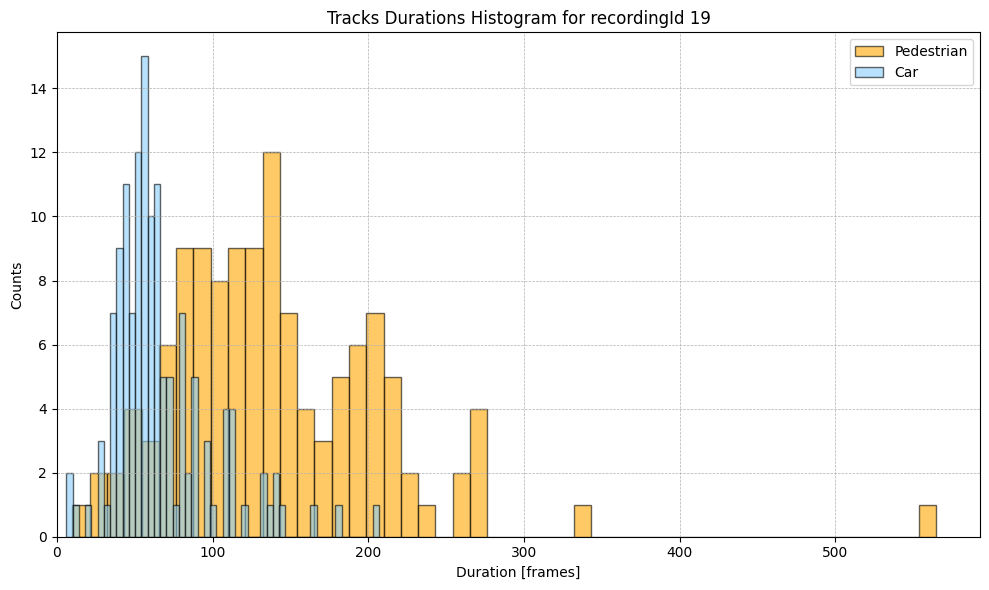

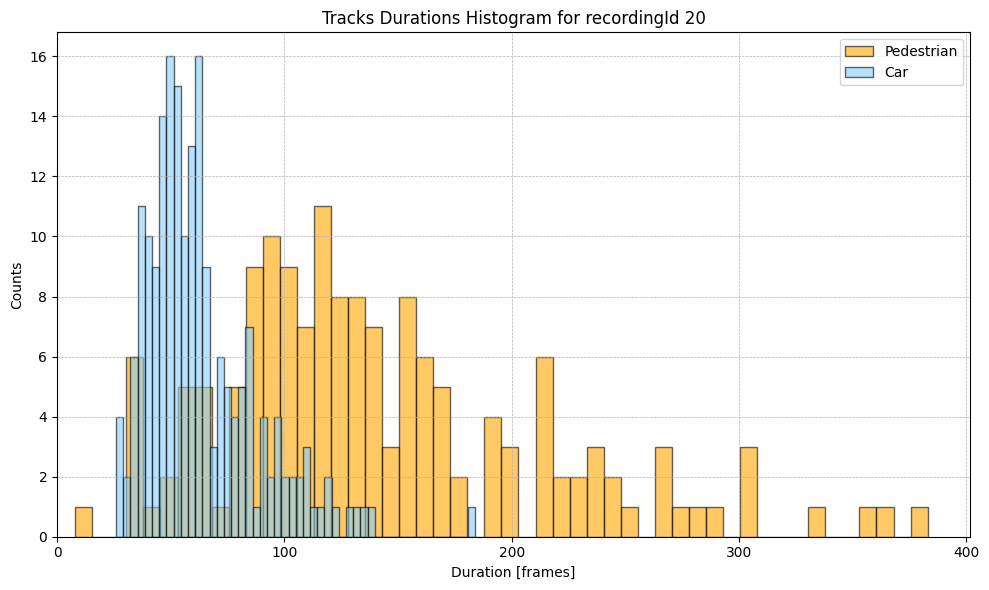

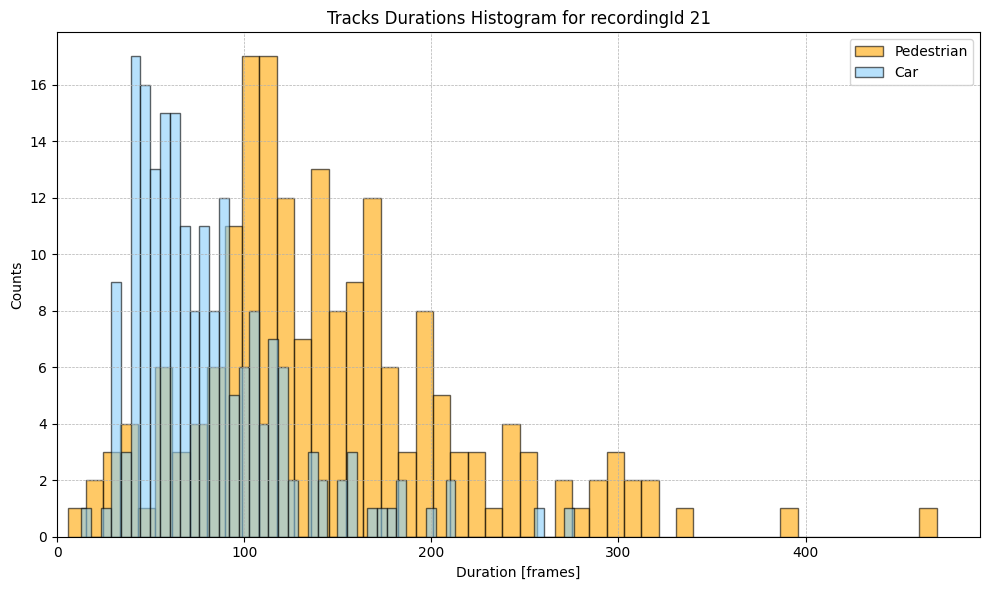

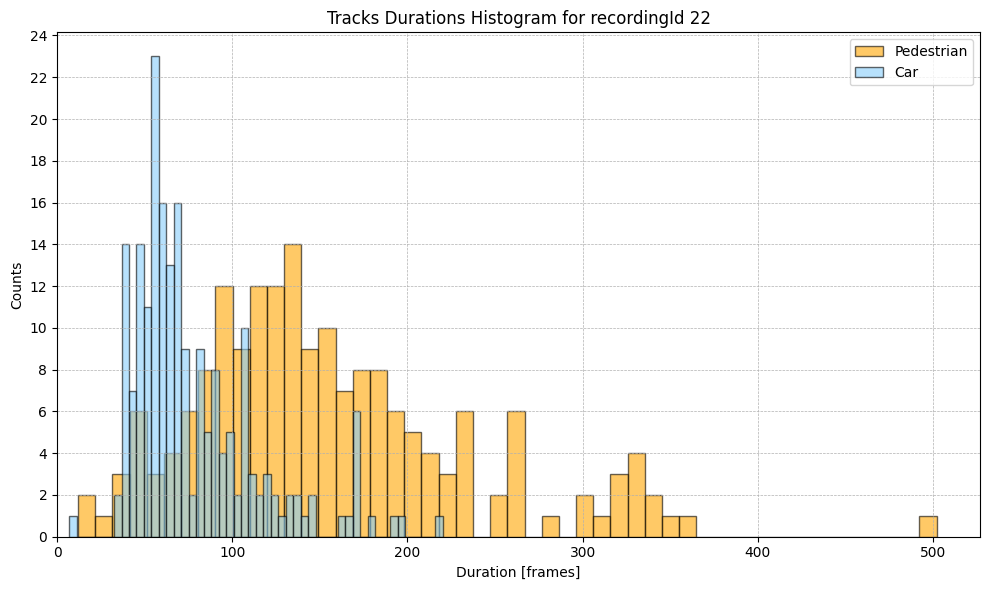

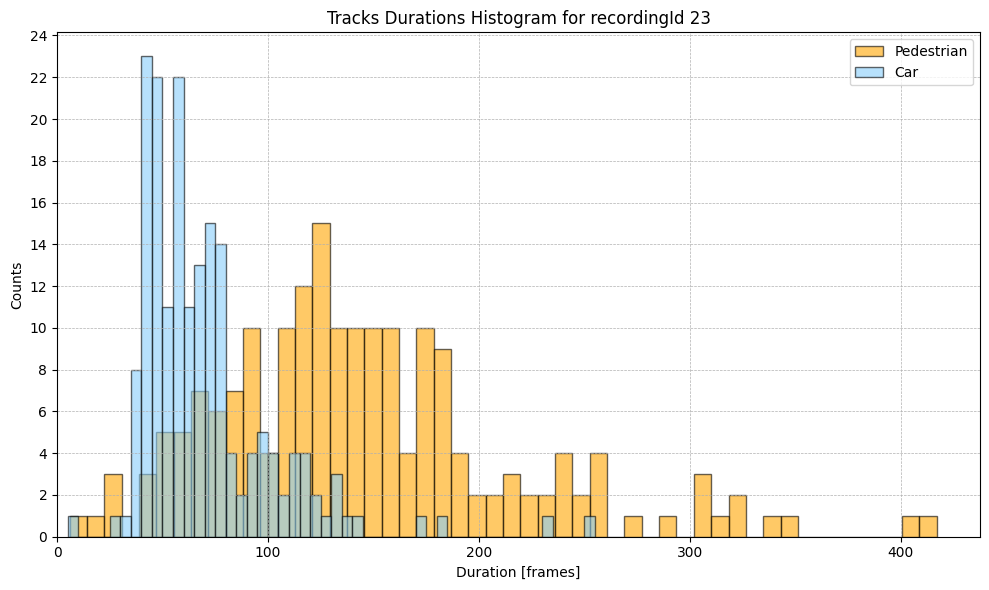

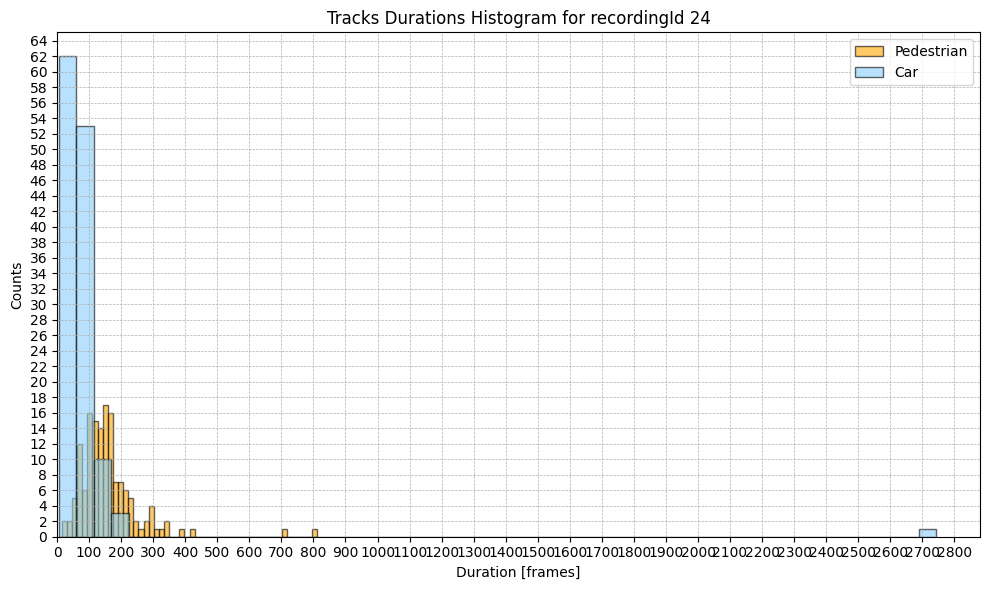

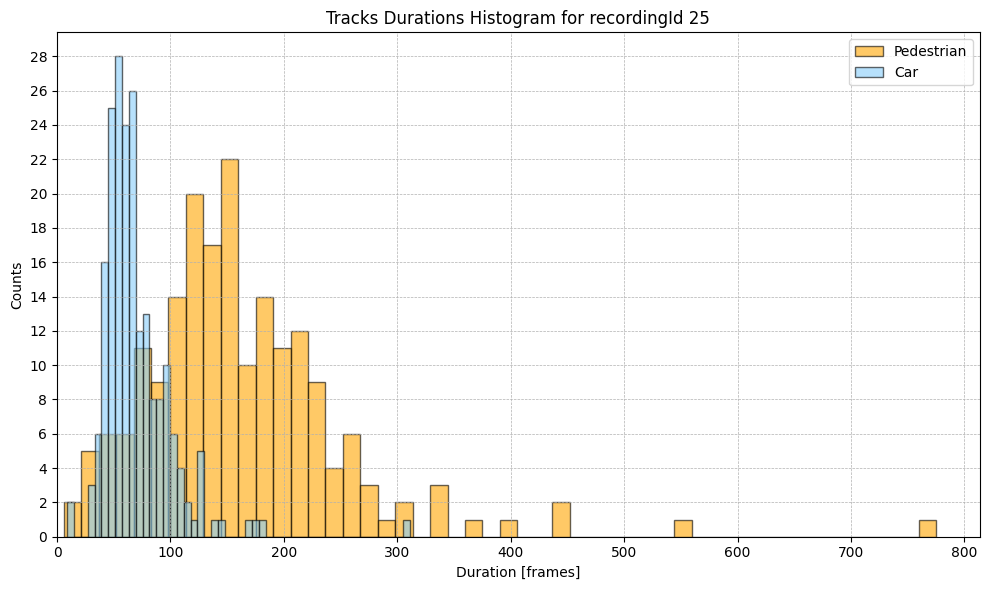

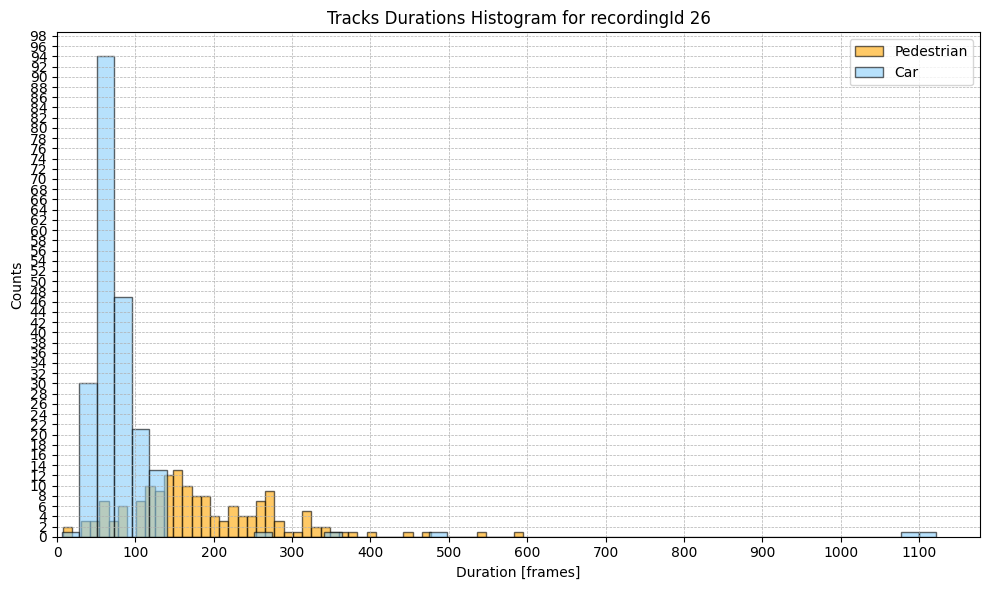

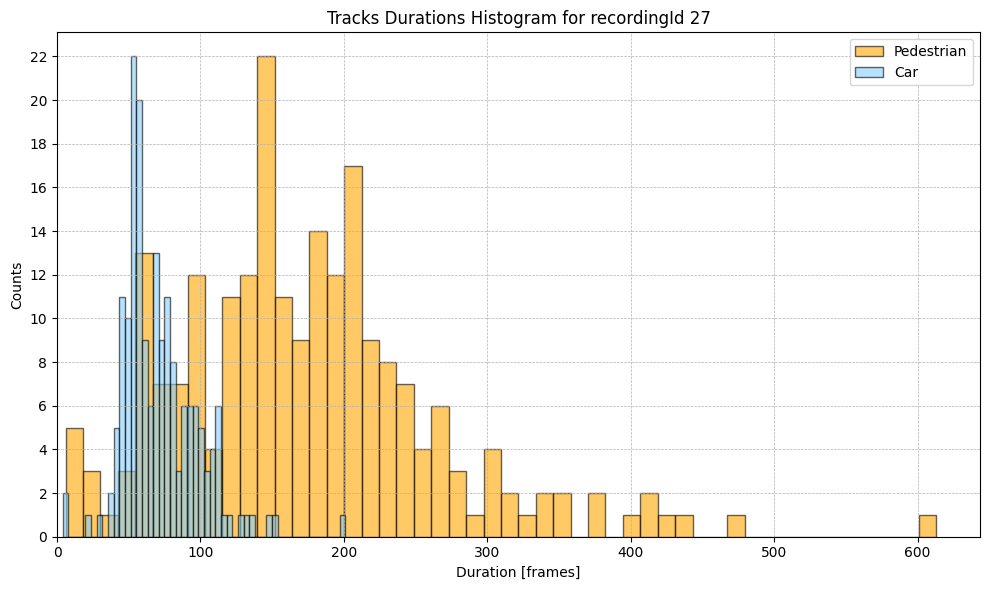

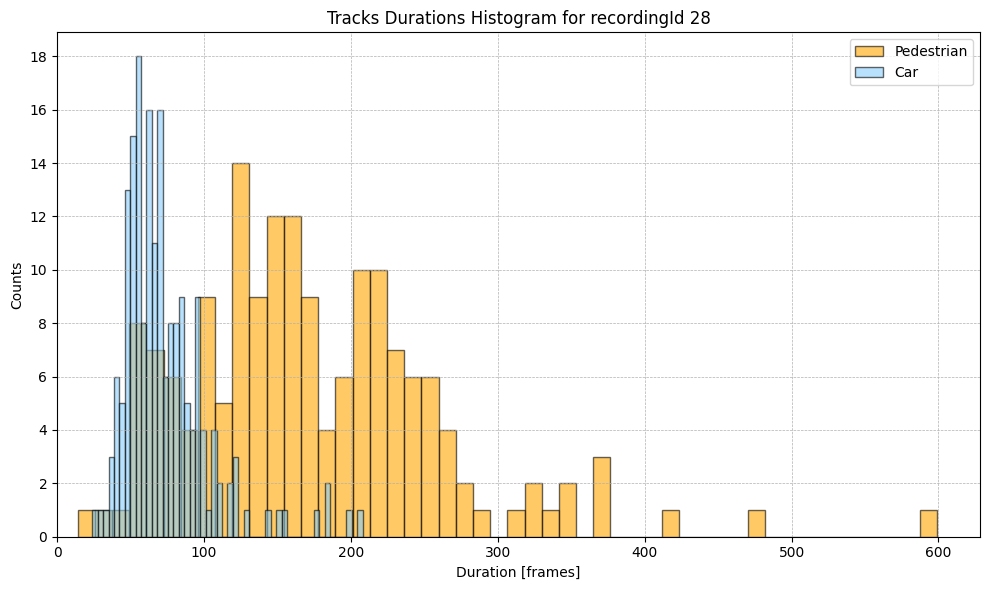

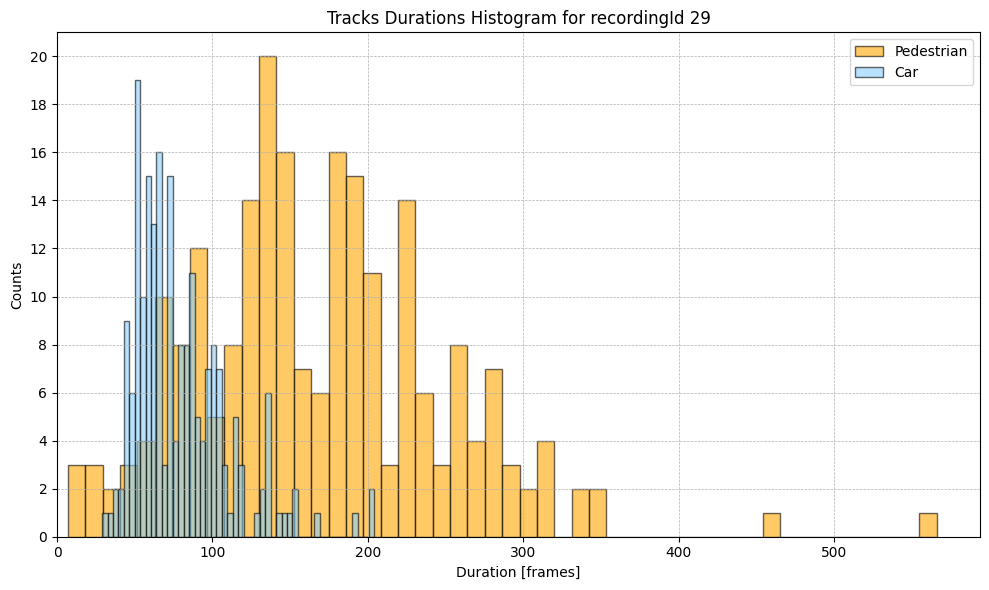

In [61]:
def print_histogram_of_duration_by_class_overlay(dfs):
    for i in range(len(dfs)):      # for each df
        df = dfs[i]
        # Pedestrian durations
        ped_df = df[df['class'] == 'pedestrian']
        ped_durations = ped_df.groupby('trackId')['trackTotalNumFrames'].max()
        # Car durations
        car_df = df[df['class'] == 'car']
        car_durations = car_df.groupby('trackId')['trackTotalNumFrames'].max()

        plt.figure(figsize=(10, 6))
        bins = 50
        plt.hist(ped_durations, bins=bins, color="orange", alpha=0.6, label='Pedestrian', edgecolor='black')
        plt.hist(car_durations, bins=bins, color="lightskyblue", alpha=0.6, label='Car', edgecolor='black')

        plt.title('Tracks Durations Histogram for recordingId ' + str(df['recordingId'].iloc[0]))
        plt.xlabel('Duration [frames]')
        plt.ylabel('Counts')
        plt.grid(True, which='both', linestyle='--', linewidth=0.5)
        # plt.minorticks_on()
        plt.xlim(left=0)
        x_max = plt.gca().get_xlim()[1]
        plt.xticks(np.arange(0, int(x_max)+1, 100))
        y_max = plt.gca().get_ylim()[1]
        plt.yticks(np.arange(0, int(y_max)+1, 2))

        plt.legend()
        plt.tight_layout()
        plt.show()

print_histogram_of_duration_by_class_overlay(dfs)